In [262]:
import re
import json
import requests
import pandas as pd

url = 'https://shopee.com.my/Cili-Lado-Sambal-Minang-250-Gram-Halal-i.34398605.8433245961'

r = re.search(r'i\.(\d+)\.(\d+)', url)
shop_id, item_id = r[1], r[2]
ratings_url = 'https://shopee.co.id/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=20&offset={offset}&shopid={shop_id}&type=0'

offset = 0
reviews_data = []

while True:
    data = requests.get(ratings_url.format(shop_id=shop_id, item_id=item_id, offset=offset)).json()

    for rating in data['data']['ratings']:
        author_username = rating['author_username'] # extract username
        comment = rating['comment'] # extract comment if written, otherwise null
        rating_star = rating['rating_star']  # Extract rating
        rating_date = rating['ctime']  # Extract date
        reviews_data.append({'Author Username': author_username, 'Comment': comment, 'Rating': rating_star, 'Date': rating_date})

    if len(data['data']['ratings']) < 20:
        break

    offset += 20

# create a dataframe from the collected data
df = pd.DataFrame(reviews_data)

# save the dataframe as a csv file
df.to_csv('shopee_reviews.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
import pandas as pd
import numpy as np

#import translated data
df2 = pd.read_excel('cililado_reviews.xlsx')
df2.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user,review,rating,date
0,anita_azrina,Taste: delicious Quality: good The parcel arri...,5,1688382244
1,m*****a,Taste: Seriously delicious Quality: Top tip No...,5,1696379181
2,asyrafringo88,Taste: delicious and delicious Quality: the be...,5,1696058776
3,nadzmianuar98,Quality:best quality Taste:taste good & not sp...,5,1696507977
4,syamil1989,Quality: looks neat Taste: licking toes (chick...,5,1687517621


In [264]:
# check the shape of the dataframe
df2.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(863, 4)

In [265]:
# check the summary of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    862 non-null    object
 1   review  412 non-null    object
 2   rating  863 non-null    int64 
 3   date    863 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
# check the columns with object data type
text_columns = df2.select_dtypes(include=['object'])
text_columns.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user,review
count,862,412
unique,680,406
top,wmhaziq90,Very tasty
freq,18,4


In [267]:
# checking the properties of numerical data
df2.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rating,date
count,863.000000,8.630000e+02
mean,4.866744,1.687059e+09
std,0.525096,1.864754e+07
min,1.000000,1.617282e+09
25%,5.000000,1.689416e+09
50%,5.000000,1.693145e+09
75%,5.000000,1.695896e+09
max,5.000000,1.696739e+09


In [268]:
# dropping the user and date columns. they are not needed for our purpose
df2 = df2.drop(['user', 'date'], axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  412 non-null    object
 1   rating  863 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [269]:
# find how many null values are there
df2.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review    451
rating      0
dtype: int64

In [270]:
# instead of null, it's replaced with an empty string instead
df2['review'].fillna('', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
# rechecking the number of null values per column
df2.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


review    0
rating    0
dtype: int64

In [272]:
import nltk
import glob
import os
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

import re
import string

# a function to clean the comments
def clean_text(sentence):
    # convert sentence to lowercase
    sentence = sentence.lower()

    # remove url from sentence
    pattern = re.compile('https?://\S+')
    sentence = pattern.sub('', sentence)

    # remove social media handles
    sentence = re.sub(r'(^|\s)@(\w+)', '', sentence)

    # Replace colons ':' with spaces
    sentence = sentence.replace(":", " ")

    # remove emojis via Unicode patterns
    emo = re.compile("["
        u"\U0001F600-\U0001FFFF"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    sentence = emo.sub(r'', sentence)

    sentence = sentence.lower()

    # remove special characters and punctution
    sentence = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", sentence)
    # replace any inline character with space
    sentence = sentence.replace("\n", " ")

    # tokenize each sentence
    tokens = word_tokenize(sentence)

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # keep only alphabetical words
    words = [word for word in stripped if word.isalpha()]

    return " ".join(words)

# applying clean_text function to all reviews from the dataset
df2['cleaned_comments'] = df2['review'].apply(lambda x: clean_text(x))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:17: DeprecationWarning: invalid escape sequence '\S'
<>:17: DeprecationWarning: invalid escape sequence '\S'
<ipython-input-273-dba44dc2651c>:17: DeprecationWarning: invalid escape sequence '\S'
  pattern = re.compile('https?://\S+')
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [274]:
# applying TextBlob to all cleaned reviews
df2['review_sentiment'] = df2['cleaned_comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df2['review_sentiment']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      0.207051
1      0.275926
2      0.546875
3      0.505556
4     -0.050000
         ...   
858    0.000000
859    0.000000
860    0.000000
861    0.000000
862    0.000000
Name: review_sentiment, Length: 863, dtype: float64

In [275]:
# checking the top 5 rows
df2.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,rating,cleaned_comments,review_sentiment
0,Taste: delicious Quality: good The parcel arri...,5,taste delicious quality good the parcel arrive...,0.207051
1,Taste: Seriously delicious Quality: Top tip No...,5,taste seriously delicious quality top tip not ...,0.275926
2,Taste: delicious and delicious Quality: the be...,5,taste delicious and delicious quality the best...,0.546875
3,Quality:best quality Taste:taste good & not sp...,5,quality best quality taste taste good not spic...,0.505556
4,Quality: looks neat Taste: licking toes (chick...,5,quality looks neat taste licking toes chicken ...,-0.050000


In [276]:
import matplotlib.pyplot as plt

# define the sentiment categories based on thresholds
def categorize_sentiment(score):
    if score < 0:
        return "Negative"
    elif score == 0:
      return "Neutral"
    elif score > 0 and score < 0.5:
        return "Positive"
    elif score >= 0.5:
        return "Very Positive"

# apply sentiment categorization from the review sentiment into a new column
df2['sentiment_category'] = df2['review_sentiment'].apply(categorize_sentiment)
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,rating,cleaned_comments,review_sentiment,sentiment_category
0,Taste: delicious Quality: good The parcel arri...,5,taste delicious quality good the parcel arrive...,0.207051,Positive
1,Taste: Seriously delicious Quality: Top tip No...,5,taste seriously delicious quality top tip not ...,0.275926,Positive
2,Taste: delicious and delicious Quality: the be...,5,taste delicious and delicious quality the best...,0.546875,Very Positive
3,Quality:best quality Taste:taste good & not sp...,5,quality best quality taste taste good not spic...,0.505556,Very Positive
4,Quality: looks neat Taste: licking toes (chick...,5,quality looks neat taste licking toes chicken ...,-0.050000,Negative
...,...,...,...,...,...
858,,5,,0.000000,Neutral
859,,5,,0.000000,Neutral
860,,5,,0.000000,Neutral
861,,5,,0.000000,Neutral


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


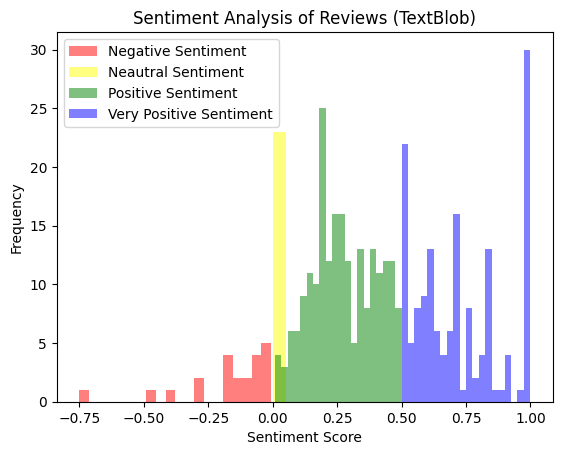

In [277]:
# separate reviews into categories based on the sentiment_category column
commented_df = df2[df2['cleaned_comments'] != '']

negative_reviews = commented_df[commented_df['sentiment_category'] == 'Negative']['review_sentiment']
neutral_reviews = commented_df[commented_df['sentiment_category'] == 'Neutral']['review_sentiment']
positive_reviews = commented_df[commented_df['sentiment_category'] == 'Positive']['review_sentiment']
very_positive_reviews = commented_df[commented_df['sentiment_category'] == 'Very Positive']['review_sentiment']

# create histograms for each review
plt.hist(negative_reviews, bins=20, alpha=0.5, color='red', label='Negative Sentiment')
plt.hist(neutral_reviews, bins=20, alpha=0.5, color='yellow', label='Neautral Sentiment')
plt.hist(positive_reviews, bins=20, alpha=0.5, color='green', label='Positive Sentiment')
plt.hist(very_positive_reviews, bins=20, alpha=0.5, color='blue', label='Very Positive Sentiment')

# add labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reviews (TextBlob)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


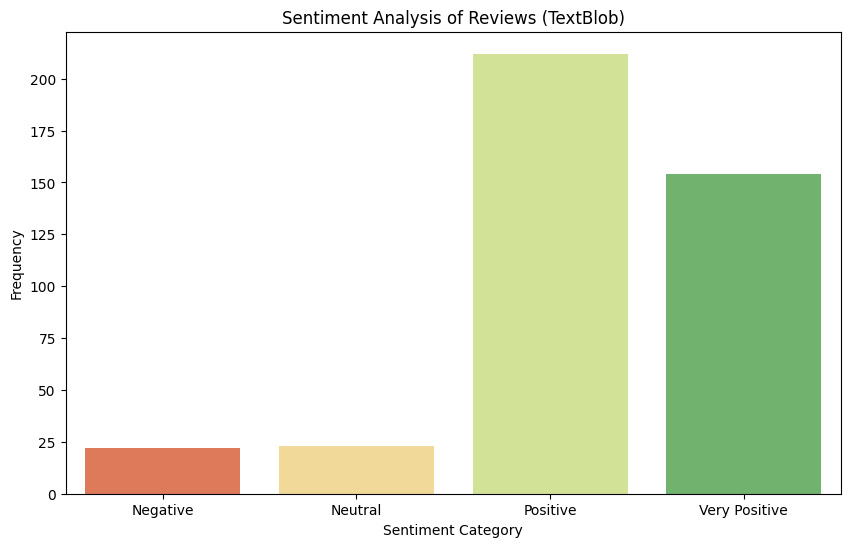

In [278]:
# separate reviews into categories based on the sentiment_category column
commented_df = df2[df2['cleaned_comments'] != '']

negative_reviews = commented_df[commented_df['sentiment_category'] == 'Negative']['review_sentiment']
neutral_reviews = commented_df[commented_df['sentiment_category'] == 'Neutral']['review_sentiment']
positive_reviews = commented_df[commented_df['sentiment_category'] == 'Positive']['review_sentiment']
very_positive_reviews = commented_df[commented_df['sentiment_category'] == 'Very Positive']['review_sentiment']

# count the frequencies of each sentiment category
negative_freq = negative_reviews.value_counts()
neutral_freq = neutral_reviews.value_counts()
positive_freq = positive_reviews.value_counts()
very_positive_freq = very_positive_reviews.value_counts()

# create a new dataframe for easy plotting
data = pd.DataFrame({
    'Sentiment Category': ['Negative', 'Neutral', 'Positive', 'Very Positive'],
    'Frequency': [negative_freq.sum(), neutral_freq.sum(), positive_freq.sum(), very_positive_freq.sum()]
})

# create a gradient from red to green
colors = sns.color_palette("RdYlGn", len(data))

# create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment Category', y='Frequency', data=data, palette=colors)

# add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reviews (TextBlob)')
plt.show()

In [279]:
# install vader
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# initialize the vader sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create an empty list to store sentiment scores
sentiment_scores = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [280]:
df3 = df2.copy()

# iterate over each comment in the 'Comment' column
for comment in df3['cleaned_comments']:
    # analyze the sentiment through vader
    sentiment_score = analyzer.polarity_scores(comment)

    # extract the compound sentiment score, which represents overall sentiment
    compound_score = sentiment_score['compound']

    # append the sentiment score to the list
    sentiment_scores.append(compound_score)

# store the sentiment scores back into the dataframe on a new column
df3['review_sentiment'] = sentiment_scores

# check the top 5 rows to check
df3.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,review,rating,cleaned_comments,review_sentiment,sentiment_category
0,Taste: delicious Quality: good The parcel arri...,5,taste delicious quality good the parcel arrive...,0.9118,Positive
1,Taste: Seriously delicious Quality: Top tip No...,5,taste seriously delicious quality top tip not ...,0.3830,Positive
2,Taste: delicious and delicious Quality: the be...,5,taste delicious and delicious quality the best...,0.9315,Very Positive
3,Quality:best quality Taste:taste good & not sp...,5,quality best quality taste taste good not spic...,0.9529,Very Positive
4,Quality: looks neat Taste: licking toes (chick...,5,quality looks neat taste licking toes chicken ...,0.6124,Negative


In [281]:
# filter to get only the negative sentiments and print them
negative_sentiments = df3[df3['review_sentiment'] < -0.5]
print(negative_sentiments)

                                                review  rating  \
198  Taste: sour, tastes stale Quality: packaging i...       5   
318  Quality: haven't tasted it yet Taste: I'll ope...       5   

                                      cleaned_comments  review_sentiment  \
198  taste sour tastes stale quality packaging is b...           -0.9451   
318  quality havent tasted it yet taste ill open it...           -0.8176   

    sentiment_category  
198           Negative  
318           Negative  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [282]:
# filter to get only the very positive sentiments and print them
positive_sentiments = df3[df3['review_sentiment'] > 0.5]
print(positive_sentiments)

                                                review  rating  \
0    Taste: delicious Quality: good The parcel arri...       5   
2    Taste: delicious and delicious Quality: the be...       5   
3    Quality:best quality Taste:taste good & not sp...       5   
4    Quality: looks neat Taste: licking toes (chick...       5   
5    Taste: delicious and spicy. Quality: the best....       5   
..                                                 ...     ...   
408                                           The best       4   
409                                          delicious       5   
413    Taste: superb Quality: superb Superb ??????????       5   
414                Quality: best... nice and excellent       5   
416    Hopefully the business will be more advanced ??       5   

                                      cleaned_comments  review_sentiment  \
0    taste delicious quality good the parcel arrive...            0.9118   
2    taste delicious and delicious quality the best... 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


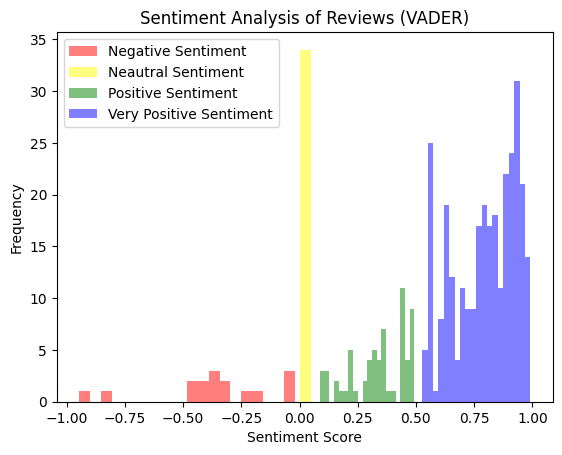

In [283]:
# apply sentiment categorization to the 'review_sentiment' column
df3['sentiment_category'] = df3['review_sentiment'].apply(categorize_sentiment)

# separate reviews into categories
commented_df2 = df3[df3['cleaned_comments'] != '']

negative_reviews = commented_df2[commented_df2['sentiment_category'] == 'Negative']['review_sentiment']
neutral_reviews = commented_df2[commented_df2['sentiment_category'] == 'Neutral']['review_sentiment']
positive_reviews = commented_df2[commented_df2['sentiment_category'] == 'Positive']['review_sentiment']
very_positive_reviews = commented_df2[commented_df2['sentiment_category'] == 'Very Positive']['review_sentiment']

# create histograms of each reviews category
plt.hist(negative_reviews, bins=20, alpha=0.5, color='red', label='Negative Sentiment')
plt.hist(neutral_reviews, bins=20, alpha=0.5, color='yellow', label='Neautral Sentiment')
plt.hist(positive_reviews, bins=20, alpha=0.5, color='green', label='Positive Sentiment')
plt.hist(very_positive_reviews, bins=20, alpha=0.5, color='blue', label='Very Positive Sentiment')

# add labels and legend
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reviews (VADER)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


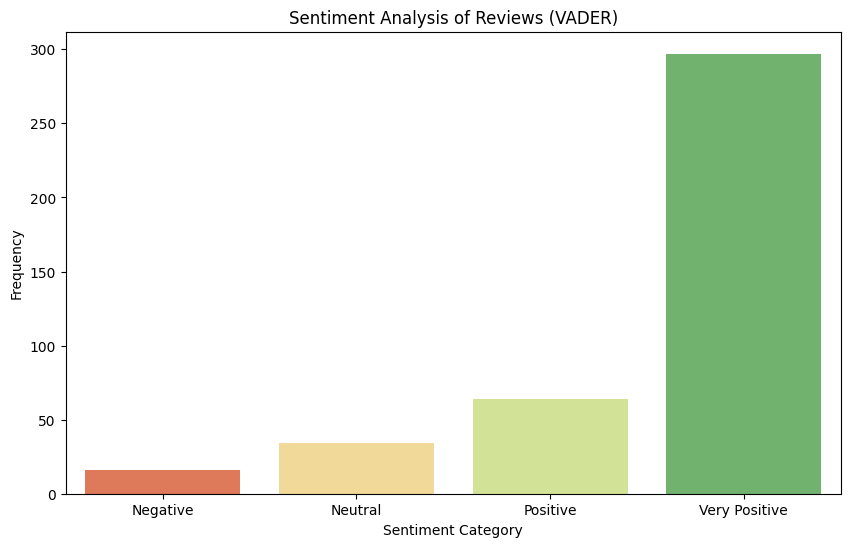

In [284]:
# separate reviews into categories
commented_df2 = df3[df3['cleaned_comments'] != '']

negative_reviews = commented_df2[commented_df2['sentiment_category'] == 'Negative']['review_sentiment']
neutral_reviews = commented_df2[commented_df2['sentiment_category'] == 'Neutral']['review_sentiment']
positive_reviews = commented_df2[commented_df2['sentiment_category'] == 'Positive']['review_sentiment']
very_positive_reviews = commented_df2[commented_df2['sentiment_category'] == 'Very Positive']['review_sentiment']

# count the frequencies of each sentiment category
negative_freq = negative_reviews.value_counts()
neutral_freq = neutral_reviews.value_counts()
positive_freq = positive_reviews.value_counts()
very_positive_freq = very_positive_reviews.value_counts()

# create a new dataframe for ease of use
data = pd.DataFrame({
    'Sentiment Category': ['Negative', 'Neutral', 'Positive', 'Very Positive'],
    'Frequency': [negative_freq.sum(), neutral_freq.sum(), positive_freq.sum(), very_positive_freq.sum()]
})

# create a gradient from red to green
colors = sns.color_palette("RdYlGn", len(data))

# create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment Category', y='Frequency', data=data, palette=colors)

# add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reviews (VADER)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


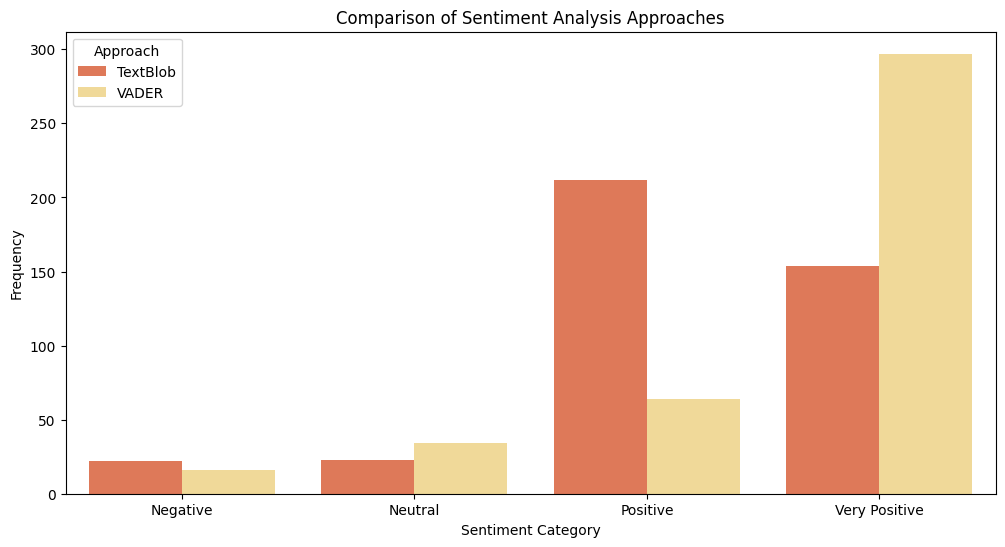

In [285]:
# separate reviews into categories for the textblob approach
commented_df1 = df2[df2['cleaned_comments'] != '']
negative_reviews1 = commented_df1[commented_df1['sentiment_category'] == 'Negative']['review_sentiment']
neutral_reviews1 = commented_df1[commented_df1['sentiment_category'] == 'Neutral']['review_sentiment']
positive_reviews1 = commented_df1[commented_df1['sentiment_category'] == 'Positive']['review_sentiment']
very_positive_reviews1 = commented_df1[commented_df1['sentiment_category'] == 'Very Positive']['review_sentiment']

# count the frequencies of each sentiment category
negative_freq1 = negative_reviews1.value_counts()
neutral_freq1 = neutral_reviews1.value_counts()
positive_freq1 = positive_reviews1.value_counts()
very_positive_freq1 = very_positive_reviews1.value_counts()

# Separate reviews into categories for the vader approach
commented_df2 = df3[df3['cleaned_comments'] != '']
negative_reviews2 = commented_df2[commented_df2['sentiment_category'] == 'Negative']['review_sentiment']
neutral_reviews2 = commented_df2[commented_df2['sentiment_category'] == 'Neutral']['review_sentiment']
positive_reviews2 = commented_df2[commented_df2['sentiment_category'] == 'Positive']['review_sentiment']
very_positive_reviews2 = commented_df2[commented_df2['sentiment_category'] == 'Very Positive']['review_sentiment']

# count the frequencies of each sentiment category
negative_freq2 = negative_reviews2.value_counts()
neutral_freq2 = neutral_reviews2.value_counts()
positive_freq2 = positive_reviews2.value_counts()
very_positive_freq2 = very_positive_reviews2.value_counts()

# create new dataframes for each approach for ease of use
data1 = pd.DataFrame({
    'Sentiment Category': ['Negative', 'Neutral', 'Positive', 'Very Positive'],
    'Frequency': [negative_freq1.sum(), neutral_freq1.sum(), positive_freq1.sum(), very_positive_freq1.sum()],
    'Approach': ['TextBlob'] * 4
})

data2 = pd.DataFrame({
    'Sentiment Category': ['Negative', 'Neutral', 'Positive', 'Very Positive'],
    'Frequency': [negative_freq2.sum(), neutral_freq2.sum(), positive_freq2.sum(), very_positive_freq2.sum()],
    'Approach': ['VADER'] * 4
})

# concatenate the two dataframes
combined_data = pd.concat([data1, data2])

# create a custom color palette for the gradient (red to green) FAILED
colors_gradient = sns.color_palette("RdYlGn", n_colors=len(data1['Sentiment Category'])) # failed process. It instead seem to only apply on each grouped bar plot

# create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sentiment Category', y='Frequency', hue='Approach', data=combined_data, palette=colors_gradient)

# add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Comparison of Sentiment Analysis Approaches')
plt.show()

In [286]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# copy the dataframe into another
df4 = df2[df2['cleaned_comments'] != ''].reset_index(drop=True)

# initialize a counter for positive and negative reviews
positive_word_frequency_counter = Counter()
negative_word_frequency_counter = Counter()

for i in range(len(df4['cleaned_comments'])):
    text = df4['cleaned_comments'][i]
    sentiment = df4['review_sentiment'][i]

    # skip short phrases
    if len(nltk.word_tokenize(text)) < 3:
        continue

    # tokenize the cleaned comment into words
    nltk_tokens = nltk.word_tokenize(text)

    # create bigrams from the words
    bigrams_list = list(nltk.bigrams(nltk_tokens))

    # convert bigrams into a list
    dictionary2 = [' '.join(tup) for tup in bigrams_list]

    # check if dictionary2 is not empty
    if dictionary2:
        try:
            # using CountVectorizer to create a bag-of-words representation for bigrams
            vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
            bag_of_words = vectorizer.fit_transform(dictionary2)
            words_freq = list(zip(vectorizer.get_feature_names_out(), bag_of_words.sum(axis=0).tolist()[0]))

            # update the word frequency counters based on sentiment labels
            if sentiment > 0:
                positive_word_frequency_counter.update(dict(words_freq))
            elif sentiment < 0:
                negative_word_frequency_counter.update(dict(words_freq))

        except ValueError as e:
            # handle exceptions if something happened
            print(f"Error for sentence: {text}")
            print(e)
    else:
        # print error message if no words are found
        print("No bigrams found for sentence: ", text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Error for sentence: share your thoughts on the product to help other buyers in the future
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: mantappackaging as thick as nature
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: the product is really the best and very tasty
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: taste so delicious it makes you want to dance
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: tasty and easy can continue to pour and eat
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: thank you for the extra i use more oil in cooking
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: very tasty the best next time i want to repeat again
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: delicious and deliciouspackaging is great
empty 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


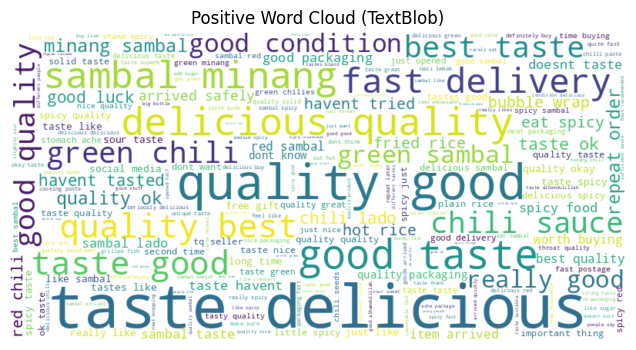

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


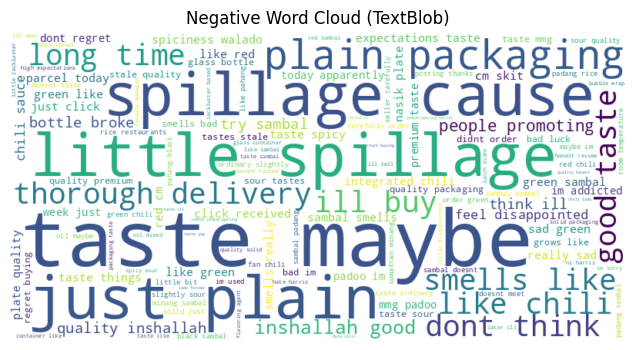

In [287]:
# define unrelated bigrams to exclude from the negative word cloud.
exclude_bigrams = {'sambal minang', 'buy sambal', 'afiq haris', 'arrived safely', 'chicken feet', 'bottle arrived',
                   'bubble wrapglass', 'licking toes', 'quality looks', 'taste licking', 'safely tqsm', 'feet packing',
                   'haris waladofinally', 'looks neat', 'seller afiq', 'neat taste', 'toes chicken', 'tqsm seller',
                   'wrapglass bottle', 'diskqun kot', 'buy tp', 'waladofinally got', 'giler murahbsambal', 'fish giler',
                   'fried luck', 'kot pay', 'murahbsambal diskqun', 'luck plus', 'plus toman', 'toman fish', 'tp live',
                   'younger sister', 'sister going', 'chili pepper', 'minang heard', 'just opened', 'pepper hope',
                   'delivery just'}

# remove specified bigrams from negative_word_frequency_counter
for bigram in exclude_bigrams:
    if bigram in negative_word_frequency_counter:
        del negative_word_frequency_counter[bigram]

# plot the positive word cloud with custom stop words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', collocation_threshold=5)
wordcloud_positive.generate_from_frequencies(positive_word_frequency_counter)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Word Cloud (TextBlob)")
plt.axis('off')
plt.show()

# plot the negative word cloud with custom stop words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', collocation_threshold=3)
wordcloud_negative.generate_from_frequencies(negative_word_frequency_counter)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Word Cloud (TextBlob)")
plt.axis('off')
plt.show()

In [288]:
# print the top 10 words for positive and negative word clouds
print("Top 10 Words for Positive Word Cloud:")
print(positive_word_frequency_counter.most_common(10))

print("\nTop 10 Words for Negative Word Cloud:")
print(negative_word_frequency_counter.most_common(10))

Top 10 Words for Positive Word Cloud:
[('taste delicious', 73), ('quality good', 45), ('good taste', 30), ('delicious quality', 28), ('sambal minang', 27), ('fast delivery', 23), ('taste good', 21), ('quality best', 21), ('best taste', 17), ('chili sauce', 16)]

Top 10 Words for Negative Word Cloud:
[('taste maybe', 2), ('little spillage', 1), ('spillage cause', 1), ('just plain', 1), ('plain packaging', 1), ('thorough delivery', 1), ('like chili', 1), ('long time', 1), ('smells like', 1), ('dont think', 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


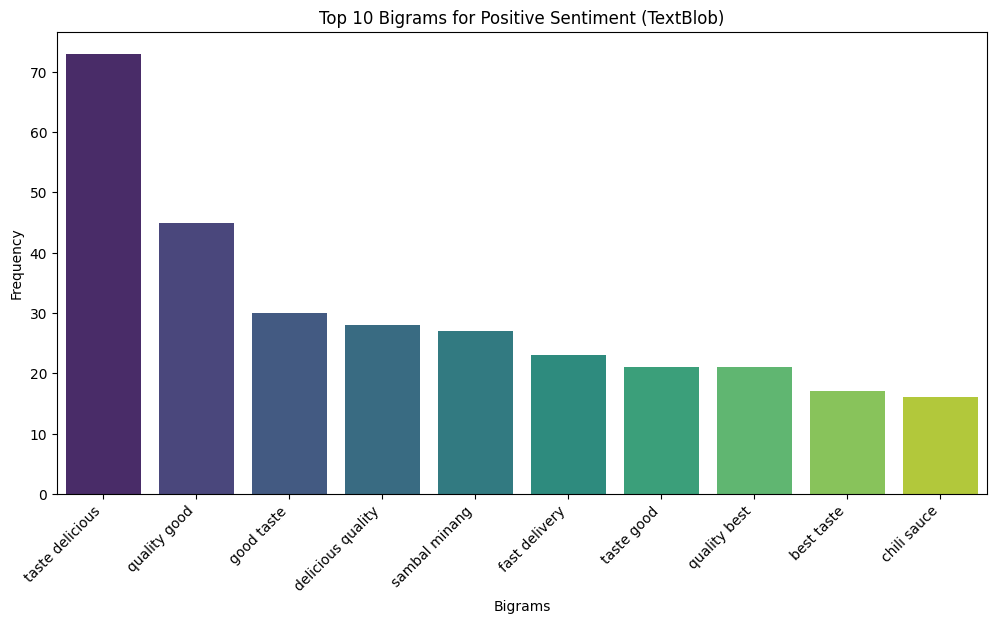

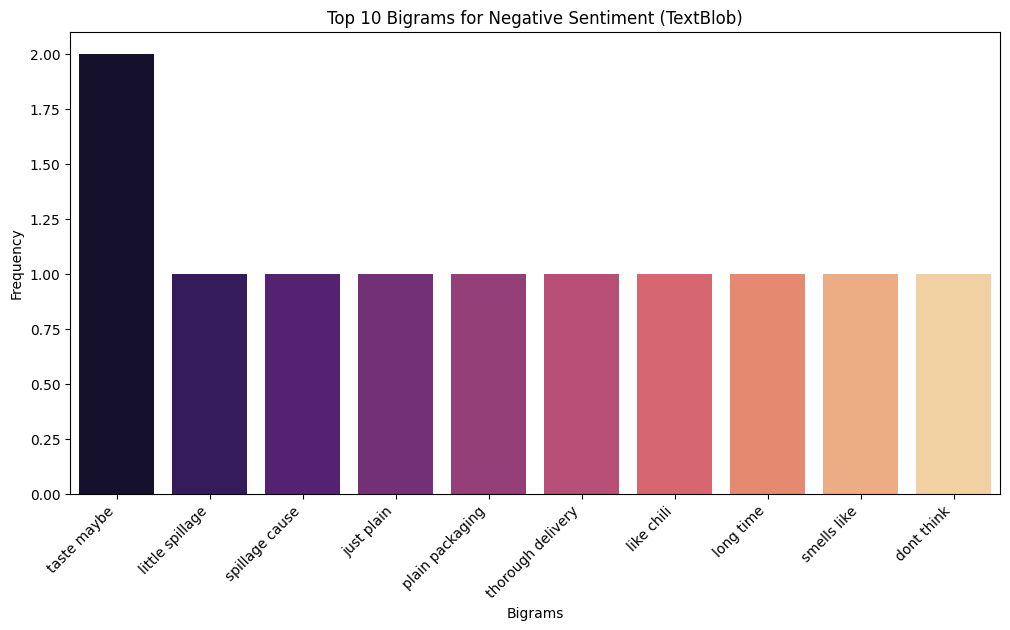

In [289]:
# extract the top bigrams and their frequencies for positive sentiment
top_positive_bigrams = positive_word_frequency_counter.most_common(10)
top_positive_bigram_words, top_positive_frequencies = zip(*top_positive_bigrams)

# extract the top bigrams and their frequencies for negative sentiment
top_negative_bigrams = negative_word_frequency_counter.most_common(10)
top_negative_bigram_words, top_negative_frequencies = zip(*top_negative_bigrams)

# convert frequencies to integers
top_positive_frequencies = [int(freq) for freq in top_positive_frequencies]
top_negative_frequencies = [int(freq) for freq in top_negative_frequencies]

# create a new dataframe for the positive bigrams
positive_df = pd.DataFrame({'Bigrams': top_positive_bigram_words, 'Frequency': top_positive_frequencies})

# create a bar plot for top bigrams in positive sentiment
plt.figure(figsize=(12, 6))
sns.barplot(data=positive_df, x='Bigrams', y='Frequency', palette='viridis')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams for Positive Sentiment (TextBlob)')
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.show()

# create a new dataframe for the negative bigrams
negative_df = pd.DataFrame({'Bigrams': top_negative_bigram_words, 'Frequency': top_negative_frequencies})

# create a bar plot for top bigrams in negative sentiment
plt.figure(figsize=(12, 6))
sns.barplot(data=negative_df, x='Bigrams', y='Frequency', palette='magma')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams for Negative Sentiment (TextBlob)')
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.show()

In [290]:
# copy df3 into another dataframe
df4 = df3[df3['cleaned_comments'] != ''].reset_index(drop=True)

# initialize a Counter for positive and negative reviews
positive_word_frequency_counter = Counter()
negative_word_frequency_counter = Counter()

for i in range(len(df4['cleaned_comments'])):
    text = df4['cleaned_comments'][i]
    sentiment = df4['review_sentiment'][i]

    # skip short phrases
    if len(nltk.word_tokenize(text)) < 3:
        continue

    # tokenize the cleaned comment into words
    nltk_tokens = nltk.word_tokenize(text)

    # create bigrams from the words
    bigrams_list = list(nltk.bigrams(nltk_tokens))

    # convert bigrams into a list
    dictionary2 = [' '.join(tup) for tup in bigrams_list]

    # check if dictionary2 is not empty
    if dictionary2:
        try:
            # using CountVectorizer to create a bag-of-words representation for bigrams
            vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
            bag_of_words = vectorizer.fit_transform(dictionary2)
            words_freq = list(zip(vectorizer.get_feature_names_out(), bag_of_words.sum(axis=0).tolist()[0]))

            # update the word frequency counters based on sentiment labels
            if sentiment > 0:
                positive_word_frequency_counter.update(dict(words_freq))
            elif sentiment < 0:
                negative_word_frequency_counter.update(dict(words_freq))

        except ValueError as e:
            # handle exceptions if something happened
            print(f"Error for sentence: {text}")
            print(e)
    else:
        # print error message if no words are found
        print("No bigrams found for sentence: ", text)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Error for sentence: share your thoughts on the product to help other buyers in the future
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: mantappackaging as thick as nature
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: the product is really the best and very tasty
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: taste so delicious it makes you want to dance
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: tasty and easy can continue to pour and eat
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: thank you for the extra i use more oil in cooking
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: very tasty the best next time i want to repeat again
empty vocabulary; perhaps the documents only contain stop words
Error for sentence: delicious and deliciouspackaging is great
empty 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


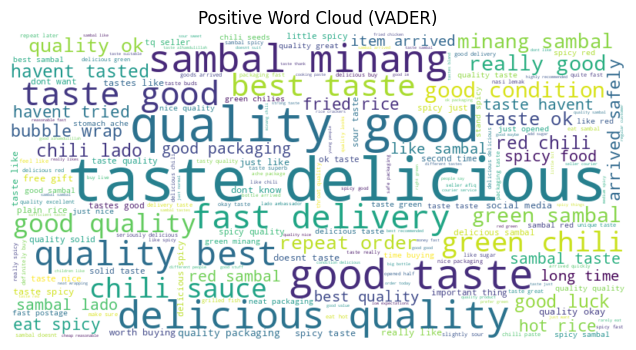

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


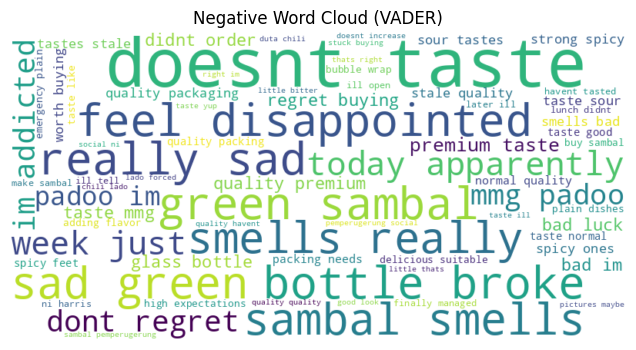

In [291]:
# define unrelated bigrams to exclude from the negative word cloud
exclude_bigrams = {'im sorry', 'dont think', 'parcel today', 'click received', 'just click', 'just opened'}

# remove specified bigrams from negative_word_frequency_counter
for bigram in exclude_bigrams:
    if bigram in negative_word_frequency_counter:
        del negative_word_frequency_counter[bigram]

# plot the positive word cloud with custom stop words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', collocation_threshold=5)
wordcloud_positive.generate_from_frequencies(positive_word_frequency_counter)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Positive Word Cloud (VADER)")
plt.axis('off')
plt.show()

# plot the negative word cloud with custom stop words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', collocation_threshold=5)
wordcloud_negative.generate_from_frequencies(negative_word_frequency_counter)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Word Cloud (VADER)")
plt.axis('off')
plt.show()

In [292]:
# print the top 10 words for positive and negative word clouds
print("Top 10 Words for Positive Word Cloud:")
print(positive_word_frequency_counter.most_common(10))

print("\nTop 10 Words for Negative Word Cloud:")
print(negative_word_frequency_counter.most_common(10))

Top 10 Words for Positive Word Cloud:
[('taste delicious', 73), ('quality good', 45), ('good taste', 31), ('delicious quality', 28), ('sambal minang', 28), ('quality best', 21), ('fast delivery', 20), ('taste good', 20), ('best taste', 17), ('green chili', 17)]

Top 10 Words for Negative Word Cloud:
[('doesnt taste', 3), ('bottle broke', 1), ('feel disappointed', 1), ('green sambal', 1), ('really sad', 1), ('sad green', 1), ('sambal smells', 1), ('smells really', 1), ('today apparently', 1), ('week just', 1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


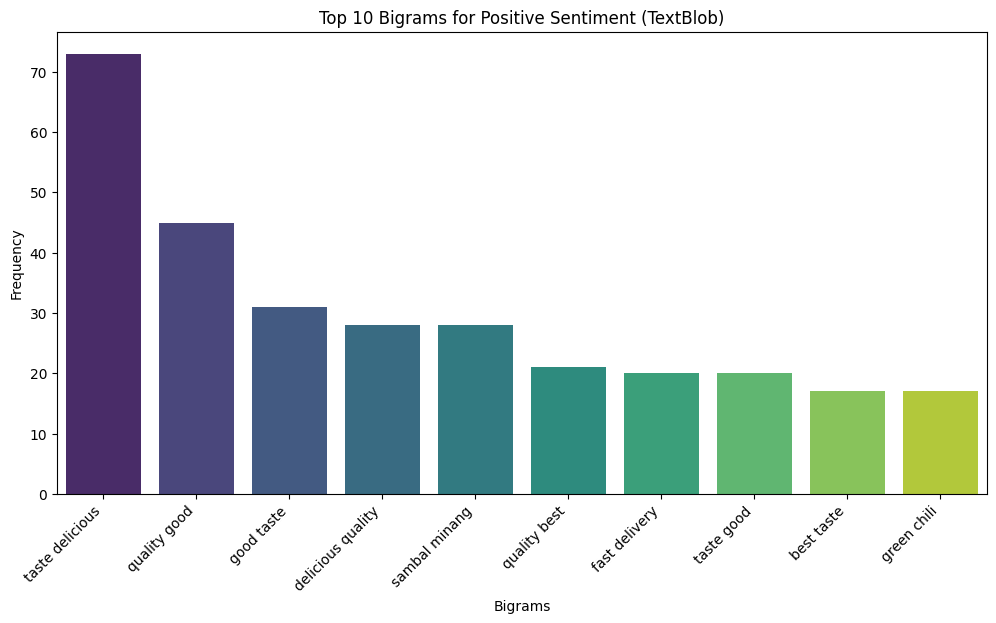

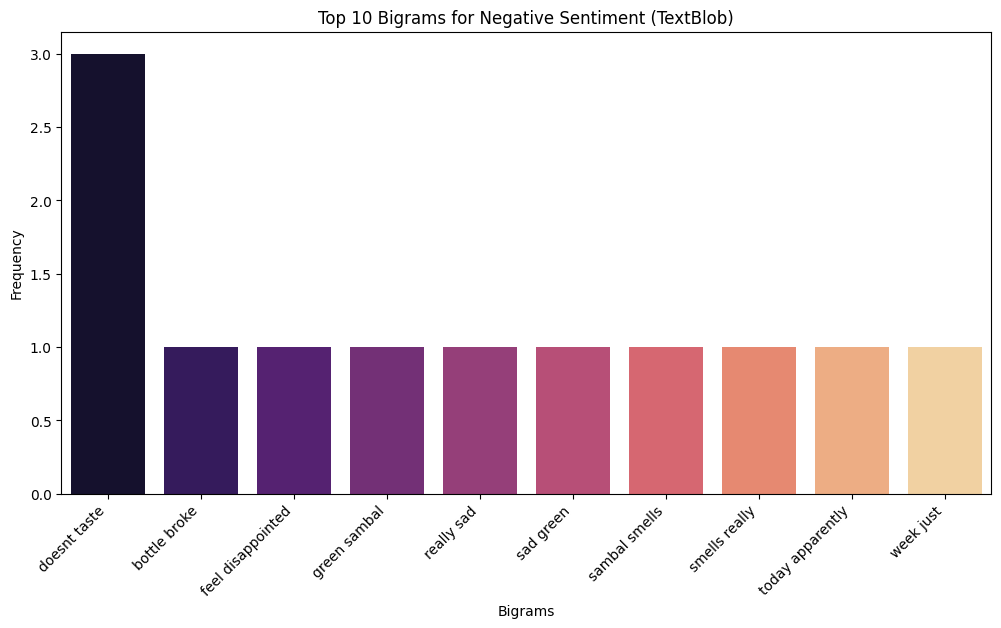

In [293]:
# extract the top bigrams and their frequencies for positive sentiment
top_positive_bigrams = positive_word_frequency_counter.most_common(10)
top_positive_bigram_words, top_positive_frequencies = zip(*top_positive_bigrams)

# extract the top bigrams and their frequencies for negative sentiment
top_negative_bigrams = negative_word_frequency_counter.most_common(10)
top_negative_bigram_words, top_negative_frequencies = zip(*top_negative_bigrams)

# convert frequencies to integers
top_positive_frequencies = [int(freq) for freq in top_positive_frequencies]
top_negative_frequencies = [int(freq) for freq in top_negative_frequencies]

# create a new dataframe for the positive bigrams
positive_df = pd.DataFrame({'Bigrams': top_positive_bigram_words, 'Frequency': top_positive_frequencies})

# create a bar plot for top bigrams in positive sentiment
plt.figure(figsize=(12, 6))
sns.barplot(data=positive_df, x='Bigrams', y='Frequency', palette='viridis')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams for Positive Sentiment (TextBlob)')
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.show()

# create a new dataframe for the negative bigrams
negative_df = pd.DataFrame({'Bigrams': top_negative_bigram_words, 'Frequency': top_negative_frequencies})

# create a bar plot for top bigrams in negative sentiment
plt.figure(figsize=(12, 6))
sns.barplot(data=negative_df, x='Bigrams', y='Frequency', palette='magma')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams for Negative Sentiment (TextBlob)')
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for better readability
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


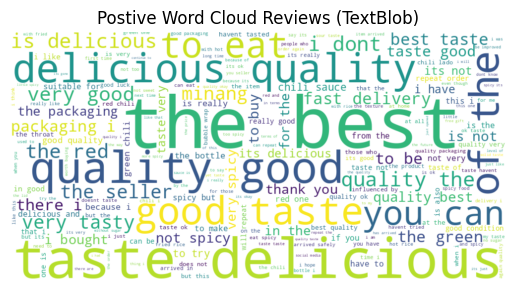

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


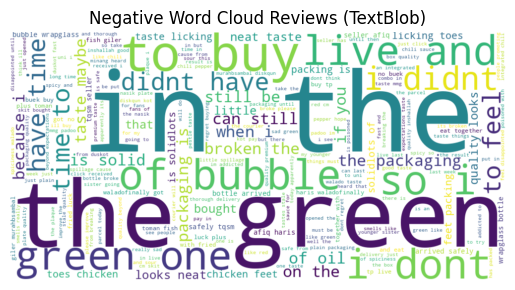

In [294]:
# copy the reviews into another variable
reviews = df2['cleaned_comments'].str.cat(sep=' ')

# excluded words from the wordcloud. Doesn't work that well
excluded_words = {'sambal', 'a', 'it', 'a little', 'it can', 'want', 'the green', 'in the', 'to buy'}

# create a word cloud for the postive reviews
wordcloud_reviews = WordCloud(width=1000, height=500,
background_color='white', collocation_threshold=3, stopwords=excluded_words).generate(reviews)
plt.imshow(wordcloud_reviews, interpolation='bilinear')
plt.title("Postive Word Cloud Reviews (TextBlob)")
plt.axis('off')
plt.show()

# create a word cloud for the negative reviews
negative_reviews = df2[df2['review_sentiment'] < 0]['cleaned_comments'].str.cat(sep=' ')
wordcloud_negative = WordCloud(width=1000, height=500, background_color='white', collocation_threshold=3, stopwords=excluded_words).generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Word Cloud Reviews (TextBlob)")
plt.axis('off')
plt.show()

#maybe separate word clouds on the basis of positive and negative reviews
#the words are not clear compared to bigrams

In [295]:
# extracting word frequencies from the word cloud
positve_word_frequencies = wordcloud_reviews.words_
negative_word_frequencies = wordcloud_negative.words_

# get the top 10 words for positive and negative
top_10_positive_words = list(positve_word_frequencies.keys())[:10]
top_10_negative_words = list(negative_word_frequencies.keys())[:10]

# print the top 10 words for positive and negative
print("Top 10 Words for Postive:")
print(top_10_positive_words)
print("\nTop 10 Words for Negative:")
print(top_10_negative_words)

Top 10 Words for Postive:
['the best', 'taste delicious', 'quality good', 'of the', 'delicious quality', 'good taste', 'to eat', 'you can', 'quality the', 'i dont']

Top 10 Words for Negative:
['in the', 'the green', 'to buy', 'of bubble', 'live and', 'i dont', 'so i', 'green one', 'i didnt', 'didnt have']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


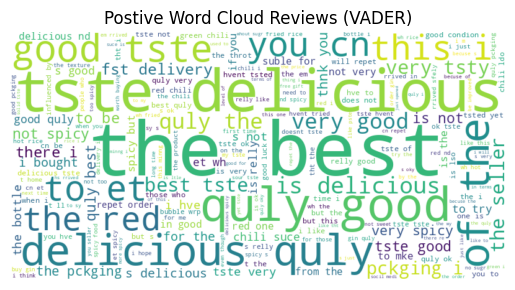

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


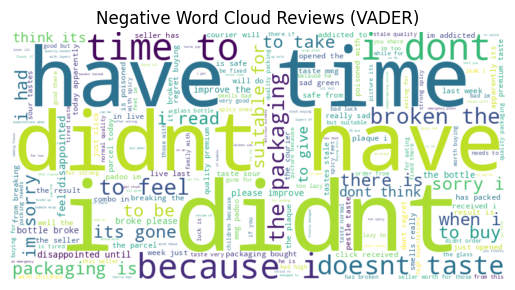

In [296]:
# copy the reviews into another variable
reviews = df3['cleaned_comments'].str.cat(sep=' ')

# exclude words from the wordcloud. Doesn't work that well
excluded_phrases = {'sambal', 'a', 'it', 'a little', 'it can', 'want', 'the green', 'in the', 'to buy','i didnt', 'didnt have', 'have time', 'time to', 'i dont', 'because i'}

# Remove excluded phrases from the reviews
for phrase in excluded_phrases:
    reviews = reviews.replace(phrase, '')

# create a positive word cloud review
wordcloud_reviews = WordCloud(width=800, height=400,
background_color='white', collocation_threshold=3, stopwords=excluded_words).generate(reviews)
plt.imshow(wordcloud_reviews, interpolation='bilinear')
plt.title("Postive Word Cloud Reviews (VADER)")
plt.axis('off')
plt.show()


# create a negative word cloud review
negative_reviews = df3[df3['review_sentiment'] < 0]['cleaned_comments'].str.cat(sep=' ')
# for phrase in excluded_phrases:
#     negative_reviews = reviews.replace(phrase, '')
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', collocation_threshold=3, stopwords=excluded_words).generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Negative Word Cloud Reviews (VADER)")
plt.axis('off')
plt.show()

#maybe separate word clouds on the basis of positive and negative reviews
#the negative seems to be mixing with some positive words

In [297]:
# extracting word frequencies from the word cloud
positve_word_frequencies = wordcloud_reviews.words_
negative_word_frequencies = wordcloud_negative.words_

# get the top 10 words for positive and negative
top_10_positive_words = list(positve_word_frequencies.keys())[:10]
top_10_negative_words = list(negative_word_frequencies.keys())[:10]

# print the top 10 words for positive and negative
print("Top 10 Words for Postive:")
print(top_10_positive_words)
print("\nTop 10 Words for Negative:")
print(top_10_negative_words)

Top 10 Words for Postive:
['the best', 'tste delicious', 'quly good', 'delicious quly', 'of the', 'good tste', 'to et', 'you cn', 'this i', 'the red']

Top 10 Words for Negative:
['i didnt', 'didnt have', 'have time', 'time to', 'i dont', 'because i', 'doesnt taste', 'to feel', 'the packaging', 'broken the']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [298]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag
import scipy
from gensim import matutils
from gensim import models
import pickle
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [299]:
from nltk import word_tokenize, pos_tag
def nouns_adj(text):
    # only extract the nouns and adjectives by tokenizing a string of text
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if   is_noun_adj(pos)]
    return ' '.join(nouns_adj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [300]:
# get the nouns and adjectives from the cleaned dataframe
data_nouns_adj = pd.DataFrame(df2['cleaned_comments'].apply(nouns_adj))
print(data_nouns_adj)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                      cleaned_comments
0    taste delicious quality parcel safe packaging ...
1    taste delicious quality top tip good throat st...
2    taste delicious delicious quality best i inter...
3    quality best quality taste taste good delivery...
4    quality neat taste toes feet solidlots bubble ...
..                                                 ...
858                                                   
859                                                   
860                                                   
861                                                   
862                                                   

[863 rows x 1 columns]


In [301]:
from sklearn.feature_extraction.text import CountVectorizer

# re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns_adj['cleaned_comments'])
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names_out())
data_dtmn.index = data_nouns_adj.index
data_dtmn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,able,acceptable,accepts,ache,acidity,act,ada,added,addictive,admin,...,yang,years,yellow,yesterday,young,younger,yummy,zakat,zargus,zesty
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [302]:
from gensim import corpora

# converts a sparse matrix into a gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
# create the vocabulary dictionary
id2wordn = corpora.Dictionary.from_corpus(corpusn, id2word = dict((v, k) for k, v in cvn.vocabulary_.items()))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [303]:
from gensim import corpora
from gensim.matutils import Sparse2Corpus

# Convert sparse matrix to a list of tokenized documents
tokenized_docs = data_nouns_adj['cleaned_comments'].apply(lambda x: x.split())

# Create Dictionary
id2word = corpora.Dictionary(tokenized_docs)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tokenized_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [304]:
from gensim.models import LdaModel

# specify the number of topics
num_topics = 4

# build the LDA model
lda_model = LdaModel(corpus, num_topics=4, id2word=id2word, passes=10, random_state=42)

# print the topics and their top words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.063*"good" + 0.046*"taste" + 0.041*"quality" + 0.040*"sambal" + 0.032*"i"')
(1, '0.039*"sambal" + 0.035*"i" + 0.023*"green" + 0.014*"taste" + 0.013*"spicy"')
(2, '0.051*"sambal" + 0.049*"delicious" + 0.046*"taste" + 0.041*"quality" + 0.032*"spicy"')
(3, '0.096*"taste" + 0.052*"quality" + 0.045*"i" + 0.043*"sambal" + 0.035*"good"')


In [305]:
# installing pyLDAvis since it's not natively installed to google collab
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.


In [306]:
# downgrading pandas is required for it to work with pyLDAvis
!pip install pandas==1.5.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [307]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pandas as pd

# visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
pyLDAvis.save_html(vis, 'lda_visualization.html') # save the model as a HTML file
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.067851  0.016337       1        1  37.767181
0     -0.050686 -0.088211       2        1  30.863038
2     -0.011529  0.089770       3        1  22.082305
1      0.130066 -0.017896       4        1   9.287476, topic_info=          Term        Freq       Total Category  logprob  loglift
5        green   63.000000   63.000000  Default  30.0000  30.0000
0    delicious  150.000000  150.000000  Default  29.0000  29.0000
34       chili   54.000000   54.000000  Default  28.0000  28.0000
4         good  180.000000  180.000000  Default  27.0000  27.0000
11      sambal  219.000000  219.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
329        bit    1.940987    7.194993   Topic4  -5.4882   1.0663
254      fried    1.912063   13.279658   Topic4  -5.5032   0.4385
65      little    1.966253   31.610241   Topic4  -5.4753  -0.4008
4         good    2.121376  180.618758   Topic4  -5.3994  -2.0678
105     flavor    1.660629   12.286044   Topic4  -5.6442   0.3752

[274 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
743       4  0.691298        able
999       4  0.911629       added
50        2  0.975486        afiq
515       4  0.911129  aftertaste
671       3  0.818636       alert
...     ...       ...         ...
32        3  0.341113       worth
32        4  0.227408       worth
81        2  0.624486   yesterday
81        4  0.208162   yesterday
514       2  0.915868       young

[384 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [308]:
topics_list = []

# iterate to find the topics and their top words
for i, topic in enumerate(lda_model.print_topics()):
    topic_words = [word.split('*')[1].strip().strip('"') for word in topic[1].split('+')]
    topics_list.append(topic_words)

# print the topic list and their top words
print(topics_list)

[['good', 'taste', 'quality', 'sambal', 'i', 'best', 'delicious', 'seller', 'tasty', 'order'], ['sambal', 'i', 'green', 'taste', 'spicy', 'red', 'great', 'rice', 'quality', 'stock'], ['sambal', 'delicious', 'taste', 'quality', 'spicy', 'chili', 'green', 'red', 'minang', 'i'], ['taste', 'quality', 'i', 'sambal', 'good', 'delicious', 'spicy', 'best', 'ok', 'rice']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cm

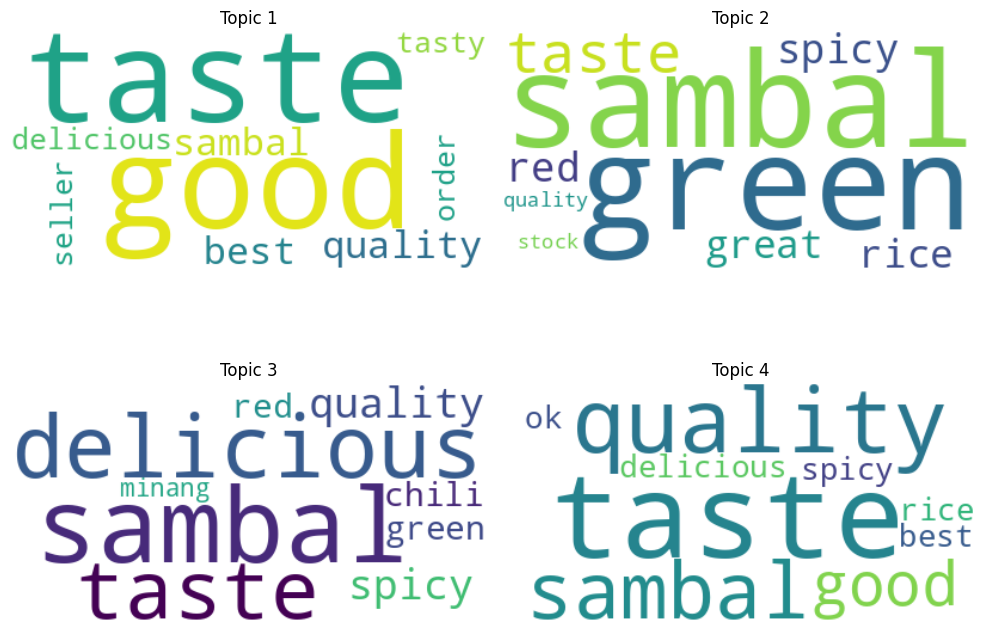

In [309]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# generate and display a word cloud for a given topic
def generate_word_cloud(ax, topic_words, topic_number):
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(topic_words))

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic_number}')
    ax.axis('off')

# create a 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# generate word clouds for the top 4 topics
for i, ax in enumerate(axs.flat):
    if i < len(topics_list):
        generate_word_cloud(ax, topics_list[i], i+1)

plt.tight_layout()
plt.show()


In [310]:
# map sentiment scores to a rating
def map_to_rating(sentiment_score, actual_rating, comment):
    if comment == '' or comment is None:
        return actual_rating
    elif sentiment_score < 0:
        return 1
    elif sentiment_score == 0:
        return 2
    elif 0 < sentiment_score < 0.3:
        return 3
    elif 0.3 <= sentiment_score < 0.5:
        return 4
    elif sentiment_score >= 0.5:
        return 5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [311]:
# apply the mapping function to create a new column 'Mapped_Rating'
df2['Mapped_Rating'] = df2.apply(lambda row: map_to_rating(row['review_sentiment'], row['rating'], row['cleaned_comments']), axis=1)

# comparing the rating between the actual and mapped rating
print('Actual Rating:')
print(df2['rating'].value_counts())
print('Mapped Rating:')
print(df2['Mapped_Rating'].value_counts())

Actual Rating:
5    798
4     30
3     24
2      7
1      4
Name: rating, dtype: int64
Mapped Rating:
5    579
3    133
4    103
2     25
1     23
Name: Mapped_Rating, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


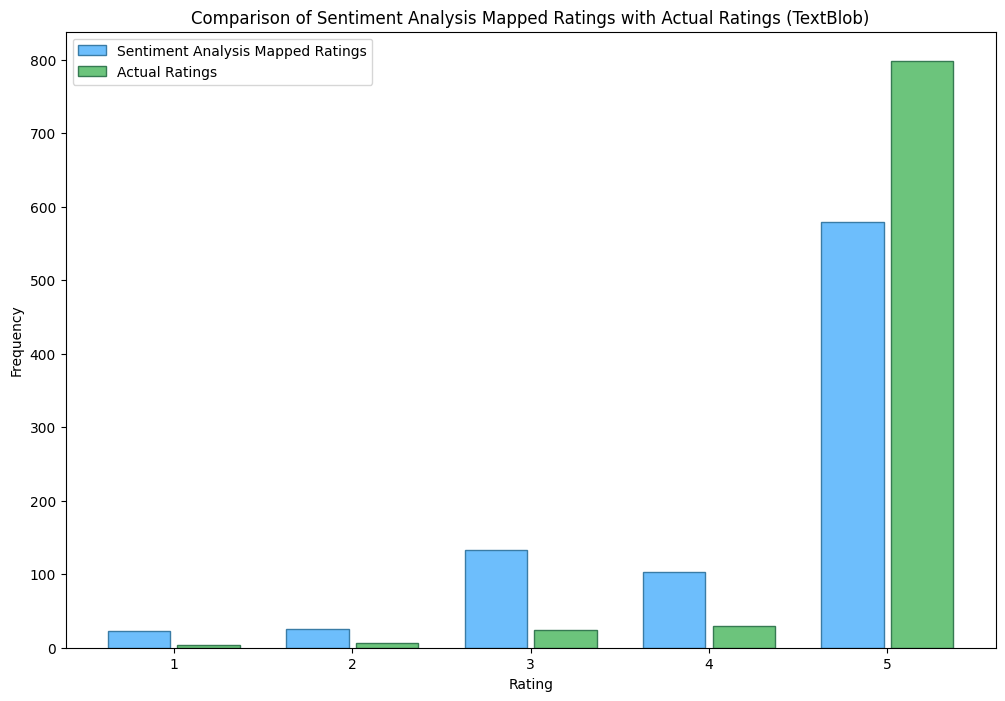

In [312]:
# create a new dataframe for easy plotting. Manually created from the .value_counts() method.
data = pd.DataFrame({
    'Rating': [1, 2, 3, 4, 5],
    'Sentiment Frequency': [23, 25, 133, 103, 579],
    'Actual Frequency': [4, 7, 24, 30, 798]
})

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# define the bar width
bar_width = 0.35

# create the bar positions
bar_positions_sentiment = np.arange(len(data['Rating']))
bar_positions_actual = bar_positions_sentiment + bar_width + 0.04

# define the colors and edgecolors
color_sentiment = '#6dbefc'
color_actual = '#6cc47c'
edgecolor_sentiment = '#3a7ca6'  # Darker version of color_sentiment
edgecolor_actual = '#367a52'  # Darker version of color_actual

# create grouped bar plot using matplotlib
ax.bar(bar_positions_sentiment, data['Sentiment Frequency'], color=color_sentiment, edgecolor=edgecolor_sentiment, label='Sentiment Analysis Mapped Ratings', width=bar_width)
ax.bar(bar_positions_actual, data['Actual Frequency'], color=color_actual, edgecolor=edgecolor_actual, label='Actual Ratings', width=bar_width)

# add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Comparison of Sentiment Analysis Mapped Ratings with Actual Ratings (TextBlob)')
plt.legend() # add legend
ax.set_xticks((bar_positions_sentiment + bar_positions_actual) / 2) # set x-axis ticks and labels
ax.set_xticklabels(data['Rating'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


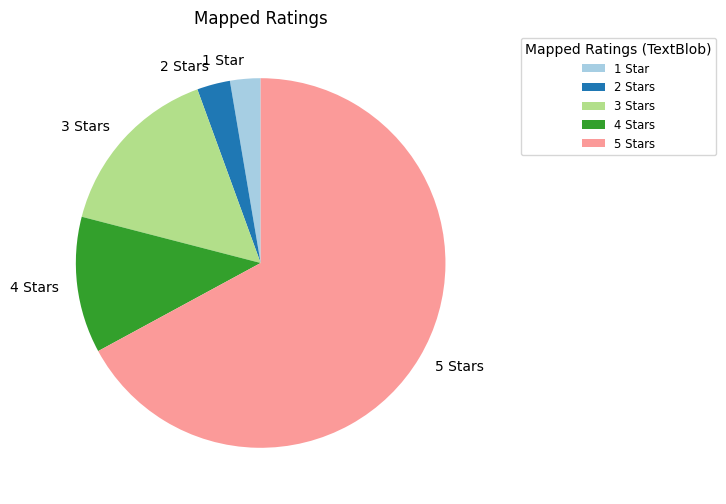

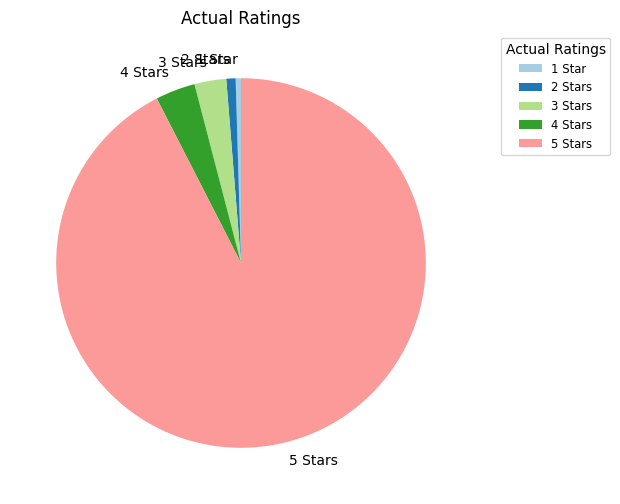

In [313]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# define the ratings and their corresponding frequencies based on .value_counts().
ratings = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
mapped_rating_freq = [23, 25, 133, 103, 579]
actual_rating_freq = [4, 7, 24, 30, 798]

# set up the matplotlib figure for Mapped Ratings
fig1, ax1 = plt.subplots(figsize=(6, 6))
wedges1, texts1 = ax1.pie(mapped_rating_freq, labels=ratings, startangle=90, colors=plt.cm.Paired.colors)
legend1 = ax1.legend(wedges1, ratings, title='Mapped Ratings (TextBlob)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
ax1.set_title('Mapped Ratings')

# show the plot for Mapped Ratings
plt.show()

# set up the matplotlib figure for Actual Ratings
fig2, ax2 = plt.subplots(figsize=(6, 6))
wedges2, texts2 = ax2.pie(actual_rating_freq, labels=ratings, startangle=90, colors=plt.cm.Paired.colors)
legend2 = ax2.legend(wedges2, ratings, title='Actual Ratings', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
ax2.set_title('Actual Ratings')

# show the plot for Actual Ratings
plt.show()

In [314]:
# apply the mapping function to create a new column 'Mapped_Rating'
df3['Mapped_Rating'] = df3.apply(lambda row: map_to_rating(row['review_sentiment'], row['rating'], row['cleaned_comments']), axis=1)

# comparing between the actual and mapped rating
print('Actual Rating:')
print(df3['rating'].value_counts())
print('Mapped Rating')
print(df3['Mapped_Rating'].value_counts())

Actual Rating:
5    798
4     30
3     24
2      7
1      4
Name: rating, dtype: int64
Mapped Rating
5    722
4     58
2     36
3     30
1     17
Name: Mapped_Rating, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


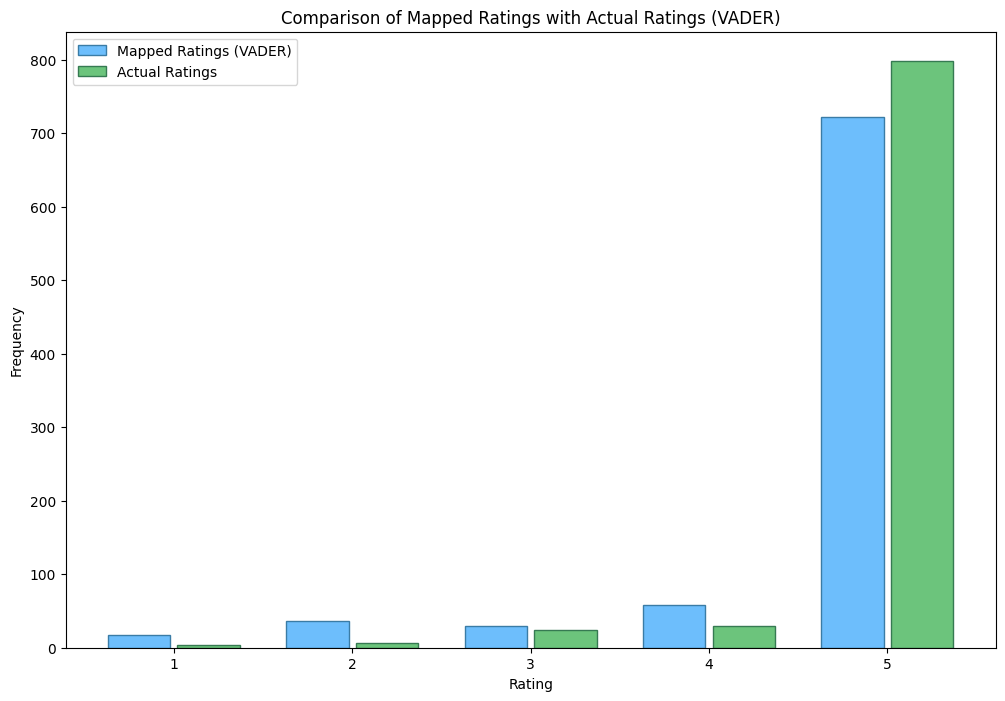

In [315]:
# define the ratings and their corresponding frequencies manually
ratings = np.array([1, 2, 3, 4, 5])
mapped_rating_freq = np.array([17, 36, 30, 58, 722])
actual_rating_freq = np.array([4, 7, 24, 30, 798])

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# define the bar width
bar_width = 0.35

# create the bar positions
bar_positions_mapped = np.arange(len(ratings))
bar_positions_actual = bar_positions_mapped + bar_width + 0.04

# define the colors and edgecolors
color_mapped = '#6dbefc'
color_actual = '#6cc47c'
edgecolor_mapped = '#3a7ca6'  # Darker version of color_mapped
edgecolor_actual = '#367a52'  # Darker version of color_actual

# create grouped bar plot using matplotlib
ax.bar(bar_positions_mapped, mapped_rating_freq, color=color_mapped, edgecolor=edgecolor_mapped, label='Mapped Ratings (VADER)', width=bar_width)
ax.bar(bar_positions_actual, actual_rating_freq, color=color_actual, edgecolor=edgecolor_actual, label='Actual Ratings', width=bar_width)

# add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Comparison of Mapped Ratings with Actual Ratings (VADER)')
plt.legend() # add legend
ax.set_xticks((bar_positions_mapped + bar_positions_actual) / 2) # set x-axis ticks and labels
ax.set_xticklabels(ratings)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


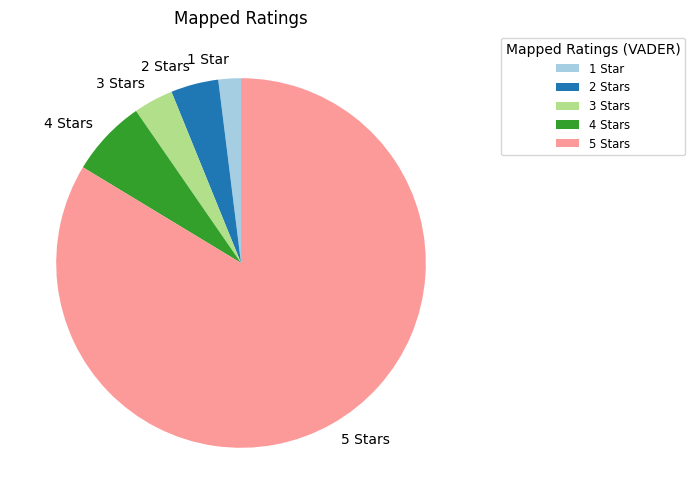

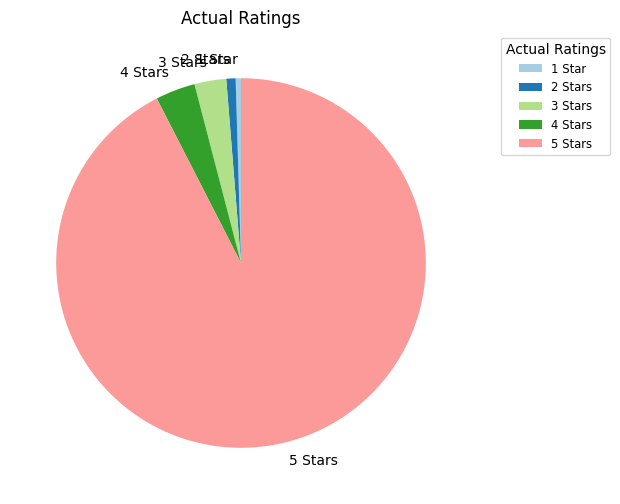

In [316]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# define the ratings and their corresponding frequencies manually
ratings = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
mapped_rating_freq = [17, 36, 30, 58, 722]
actual_rating_freq = [4, 7, 24, 30, 798]

# set up the matplotlib figure for Mapped Ratings
fig1, ax1 = plt.subplots(figsize=(6, 6))
wedges1, texts1 = ax1.pie(mapped_rating_freq, labels=ratings, startangle=90, colors=plt.cm.Paired.colors)
legend1 = ax1.legend(wedges1, ratings, title='Mapped Ratings (VADER)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
ax1.set_title('Mapped Ratings')

# show the plot for Mapped Ratings
plt.show()

# set up the matplotlib figure for Actual Ratings
fig2, ax2 = plt.subplots(figsize=(6, 6))
wedges2, texts2 = ax2.pie(actual_rating_freq, labels=ratings, startangle=90, colors=plt.cm.Paired.colors)
legend2 = ax2.legend(wedges2, ratings, title='Actual Ratings', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
ax2.set_title('Actual Ratings')

# show the plot for Actual Ratings
plt.show()